<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.146933,30.464262,63.358737,-38.869452,117.100479,156.551555,-39.451076
1,0.0,1.0,32.732393,48.490808,47.569674,63.678009,202.470884,134.336289,68.134595
2,0.0,2.0,67.308768,22.835690,55.093950,-3.386993,151.851415,155.304030,-3.452615
3,0.0,3.0,99.962705,21.924794,85.155544,-26.439265,190.603778,222.123305,-31.519527
4,0.0,4.0,81.438505,95.923656,87.908663,-2.539205,272.731620,270.771925,1.959695
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,63.299617,45.450837,24.195267,-29.864806,113.080916,141.799907,-28.718991
249996,999.0,246.0,32.180932,86.941312,23.847829,32.066916,185.036989,166.494222,18.542766
249997,999.0,247.0,88.863345,47.487124,83.999605,-28.424062,201.926012,233.850247,-31.924234
249998,999.0,248.0,49.438863,86.593616,29.058070,-56.531577,118.558971,187.618240,-69.059269


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    52.146933  30.464262  63.358737  -38.869452  117.100479   
      1.0    32.732393  48.490808  47.569674   63.678009  202.470884   
      2.0    67.308768  22.835690  55.093950   -3.386993  151.851415   
      3.0    99.962705  21.924794  85.155544  -26.439265  190.603778   
      4.0    81.438505  95.923656  87.908663   -2.539205  272.731620   
...                ...        ...        ...         ...         ...   
999.0 245.0  63.299617  45.450837  24.195267  -29.864806  113.080916   
      246.0  32.180932  86.941312  23.847829   32.066916  185.036989   
      247.0  88.863345  47.487124  83.999605  -28.424062  201.926012   
      248.0  49.438863  86.593616  29.058070  -56.531577  118.558971   
      249.0  32.496284  80.766930  34.688960  236.474623  394.426797   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    156.551555  -39.451076  
      1.0    134.336289   68.134595  
      2.0    155.304030   -3.452615  
      3.0    222.123305  -31.519527  
      4.0    270.771925    1.959695  
...                 ...         ...  
999.0 245.0  141.799907  -28.718991  
      246.0  166.494222   18.542766  
      247.0  233.850247  -31.924234  
      248.0  187.618240  -69.059269  
      249.0  170.765212  223.661585  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    52.146933  30.464262  63.358737  -38.869452  117.100479   
      1.0    32.732393  48.490808  47.569674   63.678009  202.470884   
      2.0    67.308768  22.835690  55.093950   -3.386993  151.851415   
      3.0    99.962705  21.924794  85.155544  -26.439265  190.603778   
      4.0    81.438505  95.923656  87.908663   -2.539205  272.731620   
...                ...        ...        ...         ...         ...   
999.0 245.0  63.299617  45.450837  24.195267  -29.864806  113.080916   
      246.0  32.180932  86.941312  23.847829   32.066916  185.036989   
      247.0  88.863345  47.487124  83.999605  -28.424062  201.926012   
      248.0  49.438863  86.593616  29.058070  -56.531577  118.558971   
      249.0  32.496284  80.766930  34.688960  236.474623  394.426797   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    156.551555  -39.451076  
      1.0    134.336289   68.134595  
      2.0    155.304030   -3.452615  
      3.0    222.123305  -31.519527  
      4.0    270.771925    1.959695  
...                 ...         ...  
999.0 245.0  141.799907  -28.718991  
      246.0  166.494222   18.542766  
      247.0  233.850247  -31.924234  
      248.0  187.618240  -69.059269  
      249.0  170.765212  223.661585  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.146933,30.464262,63.358737,-38.869452,117.100479,156.551555,-39.451076
1,0.0,1.0,32.732393,48.490808,47.569674,63.678009,202.470884,134.336289,68.134595
2,0.0,2.0,67.308768,22.835690,55.093950,-3.386993,151.851415,155.304030,-3.452615
3,0.0,3.0,99.962705,21.924794,85.155544,-26.439265,190.603778,222.123305,-31.519527
4,0.0,4.0,81.438505,95.923656,87.908663,-2.539205,272.731620,270.771925,1.959695
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,63.299617,45.450837,24.195267,-29.864806,113.080916,141.799907,-28.718991
249996,999.0,246.0,32.180932,86.941312,23.847829,32.066916,185.036989,166.494222,18.542766
249997,999.0,247.0,88.863345,47.487124,83.999605,-28.424062,201.926012,233.850247,-31.924234
249998,999.0,248.0,49.438863,86.593616,29.058070,-56.531577,118.558971,187.618240,-69.059269


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    52.146933  30.464262  63.358737  -38.869452  117.100479   
      1.0    32.732393  48.490808  47.569674   63.678009  202.470884   
      2.0    67.308768  22.835690  55.093950   -3.386993  151.851415   
      3.0    99.962705  21.924794  85.155544  -26.439265  190.603778   
      4.0    81.438505  95.923656  87.908663   -2.539205  272.731620   
...                ...        ...        ...         ...         ...   
999.0 245.0  63.299617  45.450837  24.195267  -29.864806  113.080916   
      246.0  32.180932  86.941312  23.847829   32.066916  185.036989   
      247.0  88.863345  47.487124  83.999605  -28.424062  201.926012   
      248.0  49.438863  86.593616  29.058070  -56.531577  118.558971   
      249.0  32.496284  80.766930  34.688960  236.474623  394.426797   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    156.551555  -39.451076  
      1.0    134.336289   68.134595  
      2.0    155.304030   -3.452615  
      3.0    222.123305  -31.519527  
      4.0    270.771925    1.959695  
...                 ...         ...  
999.0 245.0  141.799907  -28.718991  
      246.0  166.494222   18.542766  
      247.0  233.850247  -31.924234  
      248.0  187.618240  -69.059269  
      249.0  170.765212  223.661585  

[250000 rows x 7 columns]

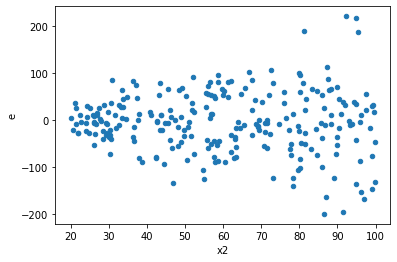

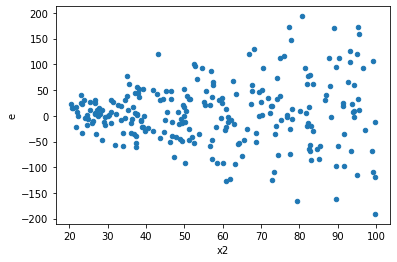

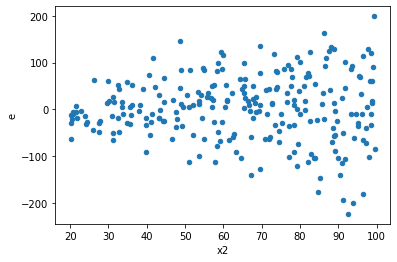

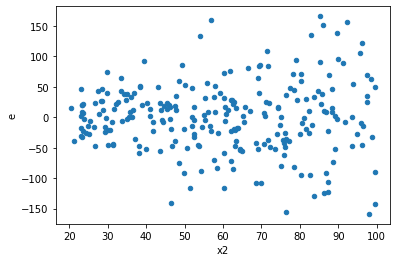

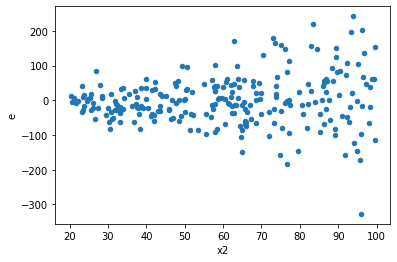

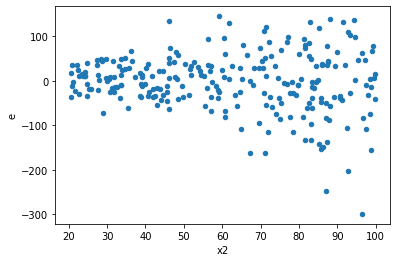

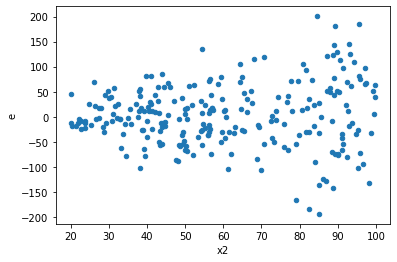

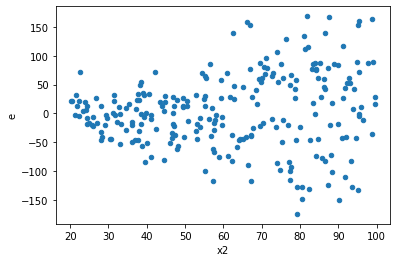

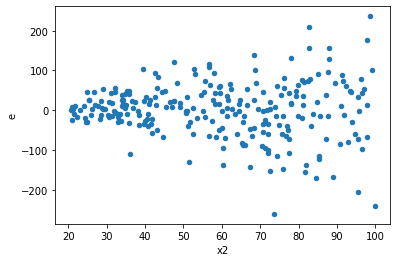

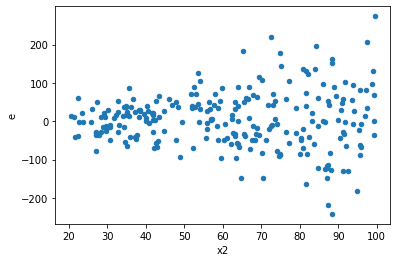

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,127.0,117.0,316214.55144530546,599856.8110708683,2489.8783578370508,5126.981291204002,2.059129224151253,9.064920631729478e-05,0.9999546753968414,4.532460315864739e-05,Reject001=0 : Heteroscedasticity
3.0,106.0,138.0,244691.92915615585,540017.5726284762,2308.4144260014705,3913.170816148378,1.6951769024102803,0.0036328460696841702,0.9981835769651579,0.0018164230348420851,Reject001=0 : Heteroscedasticity
11.0,130.0,114.0,536910.1263119255,615545.0076970167,4130.077894707119,5399.51761137734,1.30736459433297,0.14332896356678648,0.9283355182166068,0.07166448178339324,Reject001=1 : Homoscedasticity
12.0,101.0,143.0,354143.49381473276,718910.7907083551,3506.3712258884434,5027.348186771715,1.4337752231291159,0.04750189564528018,0.9762490521773599,0.02375094782264009,Reject001=1 : Homoscedasticity
13.0,130.0,114.0,563835.9296913594,728952.8082304514,4337.199459164303,6394.322879214486,1.474297629015787,0.034402569482280265,0.9827987152588599,0.017201284741140133,Reject001=1 : Homoscedasticity
24.0,131.0,113.0,332285.99065106985,685275.0072146858,2536.534279779159,6064.380594820228,2.390813577078177,3.069012232348456e-06,0.9999984654938838,1.534506116174228e-06,Reject001=0 : Heteroscedasticity
25.0,132.0,112.0,416434.78554931877,713822.4078021365,3154.808981434233,6373.414355376219,2.020221950959056,0.00015442501733375913,0.9999227874913331,7.721250866687956e-05,Reject001=0 : Heteroscedasticity
29.0,127.0,117.0,332444.8505788669,771174.5841109348,2617.6759888099755,6591.235761631921,2.5179723502099165,6.802091303548252e-07,0.9999996598954348,3.401045651774126e-07,Reject001=0 : Heteroscedasticity
30.0,112.0,132.0,388992.77917966514,825725.8602063736,3473.149814104153,6255.498940957375,1.801102536825319,0.0011964447035659465,0.999401777648217,0.0005982223517829732,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,126.0,118.0,697412.7957432437,335735.06173502223,5535.022188438442,2845.2123875849343,0.5140381177744898,0.00026468846991431575,Reject001=0 : Heteroscedasticity
1.0,127.0,117.0,316214.55144530546,599856.8110708683,2489.8783578370508,5126.981291204002,2.059129224151253,9.064920631729478e-05,Reject001=0 : Heteroscedasticity
2.0,126.0,118.0,599296.681040742,547572.3422026237,4756.322865402714,4640.443577988337,0.9756367911318051,0.8903484597776046,Reject001=1 : Homoscedasticity
3.0,106.0,138.0,244691.92915615585,540017.5726284762,2308.4144260014705,3913.170816148378,1.6951769024102803,0.0036328460696841702,Reject001=0 : Heteroscedasticity
4.0,119.0,125.0,975599.6288764091,276019.7329320795,8198.316209045455,2208.1578634566363,0.26934285128210933,3.504793428579379e-12,Reject001=0 : Heteroscedasticity
5.0,117.0,127.0,665197.8036028125,342892.508840604,5685.451312844551,2699.9410144929448,0.4748859617165744,5.515840136899744e-05,Reject001=0 : Heteroscedasticity
6.0,132.0,112.0,672842.269480492,268027.9737833625,5097.289920306757,2393.106908780022,0.4694861281572942,3.2947131037152207e-05,Reject001=0 : Heteroscedasticity
7.0,100.0,144.0,607896.3451524484,375612.28568976984,6078.963451524484,2608.418650623402,0.42908937871131003,1.0630539085249485e-05,Reject001=0 : Heteroscedasticity
8.0,126.0,118.0,778985.5150406257,396450.7044784637,6182.424722544649,3359.751732868336,0.5434359306659673,0.0008176995334874378,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    726
Reject001=1 : Homoscedasticity      274
Name: Result_test, dtype: int64